In [2]:
from sensor_msgs.msg import JointState
from std_msgs.msg import Float64MultiArray
import rosbag
import numpy as np
import matplotlib.pyplot as plt

def bag_loader(path):
    bag = rosbag.Bag(path)
    topic_name = 'robot_state'
    num_obs = bag.get_message_count(topic_name)
    if num_obs is 0:
        topic_name = '/robot_state'
        num_obs = bag.get_message_count(topic_name)
    print('Loading ros bag {}  with {} msgs'.format(path, num_obs))

    msgs = []
    t = [] 
    f = []
    
    for _, msg, t_ros in bag.read_messages(topics=[topic_name]):
        #x.append(t_ros.to_sec())
        t.append(msg.header.stamp.to_sec())
        f.append(msg.effort[2])
        msgs.append(msg)
    t, f, msgs = zip(*sorted(zip(t, f, msgs)))
    t = [ts-t[0] for ts in t]
    return t, f, msgs

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Loading ros bag contact_var/13.bag  with 120 msgs


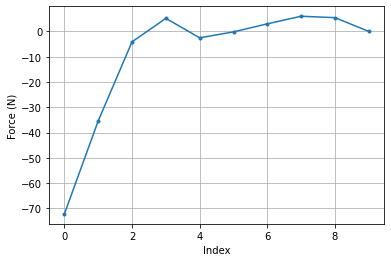

In [65]:
t, f, msgs = bag_loader('contact_var/13.bag')
rng_l = 105
rng_h = rng_l+10
plt.plot(f[rng_l:rng_h], '.-')
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('Force (N)')
plt.show()

In [66]:
with rosbag.Bag('13_contact.bag', 'w') as outbag:
    for msg in [msgs[r] for r in range(rng_l, rng_h)]:
        outbag.write('robot_state', msg)